In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import os

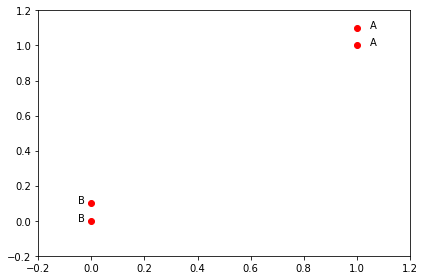

In [2]:
# 创建数据
def creatdataset():
    dataSet = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return dataSet, labels

# 可视化
dataSet, labels = creatdataset()
fig = plt.figure()
ax = plt.subplot(111)
ax.text(-0.05, 0, 'B')
ax.text(-0.05, 0.1, 'B')
ax.text(1.05, 1.0, 'A')
ax.text(1.05, 1.1, 'A')
ax.plot(dataSet[:, 0], dataSet[:, 1], 'ro')
ax.xaxis.set_ticks(np.arange(-0.2, 1.4, 0.2))
ax.yaxis.set_ticks(np.arange(-0.2, 1.4, 0.2))
plt.tight_layout()
plt.show()

### kNN算法

算法流程：
1.计算已知类别数据集中的点与测试点的距离；
2.按照距离递增排序；
3.选择与测试点距离最小的前k个点；
4.确定这k个点所属类别出现的次数/频率；
5.返回k个点出现次数/频率最高的类别作为预测结果；

In [3]:
def distEclud(vecA, vecB):
    return np.sum(np.power(vecA - vecB, 2), axis=1)**0.5

def classify0(testdata, dataSet, labels, k):
    m = dataSet.shape[0]
    dist = distEclud(dataSet, testdata)
    sortdist = dist.argsort()
    classcount = {}
    for i in range(k):
        k_label = labels[sortdist[i]]
        classcount[k_label] = classcount.get(k_label, 0) + 1
    # sortclasscount = sorted(classcount.items(), key=operator.itemgetter(1), reverse=True)
    sortclasscount = sorted(classcount.items(), key=lambda x: x[1], reverse=True)
    return sortclasscount[0][0]

testdata = np.array([0.5, 1.0])
out = classify0(testdata, dataSet, labels, 1)
print(out)

A


### 示例：使用k-近邻算法改进约会网站的配对效果

[3 2 1 1 1 1 3 3 1 3]


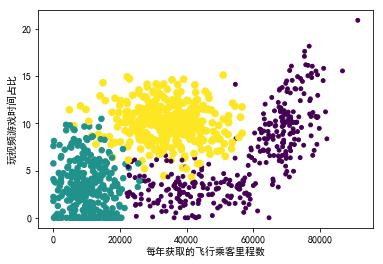

In [2]:
def file2array(filename):
    f = open(filename)
    datalist = f.readlines()
    m = len(datalist)
    # dataMat = np.zeros((m, 3))
    dataMat = []
    labellist = []
    idex = 0
    for line in datalist:
        line = line.strip()
        line = line.split('\t')
        line = [float(i) for i in line]
        dataMat.append(line[0:3])
        labellist.append(int(line[3]))
        idex += 1
    return np.asarray(dataMat), np.asarray(labellist)

out1, out2 = file2array('datingTestSet2.txt')
print(out2[0:10])

plt.rcParams['font.sans-serif']=['SimHei']
labels = ['不喜欢=1', '一般魅力=2', '非常有魅力']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('每年获取的飞行乘客里程数')
plt.ylabel('玩视频游戏时间占比')
ax.scatter(out1[:, 0], out1[:, 1], 15.0*out2, 15.0*out2)
plt.show() # legend就不画了，凑活看吧~

In [10]:
# ------------------------归一化------------------------------
def norm(dataSet):
    m = dataSet.shape[0]
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDatasets = (dataSet- dataSet.min(0))/ranges
    print(normDatasets.shape)
    return normDatasets, ranges, minVals

# 原版代码，但都差不多
# def autoNorm(dataSet):
#     minVals = dataSet.min(0)
#     maxVals = dataSet.max(0)
#     ranges = maxVals - minVals
#     normDataSet = np.zeros(np.shape(dataSet))
#     m = dataSet.shape[0]
#     normDataSet = dataSet - np.tile(minVals, (m,1))
#     normDataSet = normDataSet/np.tile(ranges, (m,1))   #element wise divide
#     return normDataSet, ranges, minVals


def datingClassTest():
    hoRatio = 0.10      #hold out 10%
    datingDataMat,datingLabels = file2array('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = norm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)

datingClassTest()

(1000, 3)
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the 

### 手写数字识别

In [10]:
def readDigits(filename):
    onedata = []
    f = open(filename)
    for line in range(32):
        line = f.readline()
        line = [int(i) for i in line.strip()]
        onedata += line
    return onedata

# 原版代码
# def img2vector(filename):
#     returnVect = np.zeros((1,1024))
#     fr = open(filename)
#     for i in range(32):
#         lineStr = fr.readline()
#         for j in range(32):
#             returnVect[0,32*i+j] = int(lineStr[j])
#     return returnVect
onedata = readDigits('testDigits/0_0.txt')
onedata = np.asarray(onedata)
print(onedata.shape)

(1024,)


In [8]:
def classifyDigits():
    trainlabels = []
    traindatas = []
    traintxtlist = os.listdir('trainingDigits')
    m = len(traintxtlist)
    for i in range(m):
        onelabel = int(traintxtlist[i].split('_')[0])
        trainlabels.append(onelabel)
        onedata = readDigits(os.path.join('trainingDigits', traintxtlist[i]))
        traindatas.append(onedata)
    # trainlabels = np.asarray(trainlabels)
    traindatas = np.asarray(traindatas)

    testtxtlist = os.listdir('testDigits')
    errorCount = 0.0
    mt = len(testtxtlist)
    for i in range(mt): 
        onetestdata = readDigits(os.path.join('testDigits', testtxtlist[i]))
        onetestdata = np.asarray(onetestdata)
        testlabel = int(testtxtlist[i].split('_')[0])
        out = classify0(onetestdata, traindatas, trainlabels, 5)
        print('the classifier out is: %d, the real answer is: %d' % (out, testlabel))
        if out != testlabel:
            errorCount += 1.0
    print('\nthe total number of errors is: %d' % errorCount)
    print('\nthe total error rate is: %.2f' % (errorCount/float(mt)))

classifyDigits()

the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answer is: 0
the classifier out is: 0, the real answe

k近邻分类代码就这些，其实机器学习实战这本书的算法原理扩展的太少~算法部分还得去看其他资料

小总结：
1、KNN算法原理简单，但计算复杂度高，对低维数据较为适合，不适合高维数据，高维度向量之间的距离通常是反直觉的，人眼觉得有区别但对像素计算出的像素距离差异性不大
2、高维空间直觉上是无效的，会使得算法难以决策、带来无用的噪音信号等
3、超参数选取(k取值、衡量距离类型)，解决办法是从训练集中划分出验证集，用于验证不同超参数设置的效果，最后在测试集上运行
4、如果训练数据量不够，使用交叉验证方法，测试时不能将验证集再次与测试集合并，这样结果会出现变化，破坏了对最优参数的估计
5、KNN不适合图像分类

In [ ]:
参考：
1、http://cs231n.github.io/classification/